<a href="https://colab.research.google.com/github/ankitagithub13/capstone-chatbot/blob/dev_capstone_preprocessing/EDA_PreProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [52]:
import numpy as np
import pandas as pd
import spacy
import nltk
import re

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk import stem,tokenize
from nltk.tokenize import ToktokTokenizer
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer,PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
#Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
df = pd.read_csv('Data Set - industrial_safety_and_health_database_with_accidents_description.csv',index_col=False)

In [55]:
print(df.shape)

df.head()

(425, 11)


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [56]:
# Drop and Rename Columns 
df.drop("Unnamed: 0", axis=1, inplace=True)
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


In [57]:
df.columns

Index(['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee type', 'Critical Risk',
       'Description'],
      dtype='object')

In [58]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee type             425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [59]:
# Check Null Values
df.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

In [60]:
x = df['Description']

string_d = '||'.join(x)
# string_d

string_s = ''.join(x)
# string_s

Most repeated Words in a column: Description
['While', 'removing', 'the', 'drill', 'rod', 'of', 'the', 'Jumbo', '08', 'for', 'maintenance', ',', 'the', 'supervisor', 'proceeds', 'to', 'loosen', 'the', 'support', 'of', 'the', 'intermediate', 'centralizer', 'to', 'facilitate', 'the', 'removal', ',', 'seeing', 'this', 'the', 'mechanic', 'supports', 'one', 'end', 'on', 'the', 'drill', 'of', 'the', 'equipment', 'to', 'pull', 'with', 'both', 'hands', 'the', 'bar', 'and', 'accelerate', 'the', 'removal', 'from', 'this', ',', 'at', 'this', 'moment', 'the', 'bar', 'slides', 'from', 'its', 'point', 'of', 'support', 'and', 'tightens', 'the', 'fingers', 'of', 'the', 'mechanic', 'between', 'the', 'drilling', 'bar', 'and', 'the', 'beam', 'of', 'the', 'jumbo.||During', 'the', 'activation', 'of', 'a', 'sodium', 'sulphide', 'pump', ',', 'the', 'piping', 'was', 'uncoupled', 'and', 'the', 'sulfide', 'solution', 'was', 'designed', 'in', 'the', 'area', 'to', 'reach', 'the', 'maid', '.', 'Immediately', 'she'

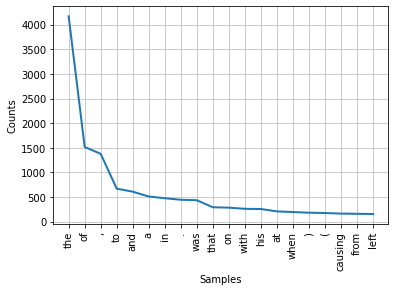

In [61]:
print("Most repeated Words in a column: Description")
word_token = word_tokenize(string_d)
print(word_token)

cts = nltk.FreqDist(word_token)
cts.plot(20)

In [62]:
import spacy
nlp = spacy.load('en_core_web_sm')

def sentence_count(string):
  about_doc = nlp(string)
  sentences = list(about_doc.sents)  
  return len(sentences)

# length = sentence_count(string_s)

***********Get the sentence count of original Description column****************

Unique Counts :  [2 3 1 4 5 8 7 6 9]
Minimum sentence_count of a line: 1
Maximum sentence_count of a line: 9
Line with maximum length:-
When the mechanical technician proceeded to perform the maintenance of motor supports of a tipper, he decided to bring a wooden block, for which he moved to the temporary storage of materials - located at 10 m. of the tipper - in circumstances in which he sought the cue; the camera of a tire burst suddenly (it was on the right and 2 m. of the involved); the thunderous sound affected the right ear of the worker. The tire that exploded has 110 psi of pressure approximately, at the time of the event they were stacked 3 pneumatic, the second was the one that exploded (presented cut - place where the energy was released). The tire that was in the upper part was not projected. The tires were left by the previous guard (night shift), the storage area does not have a roof. In the

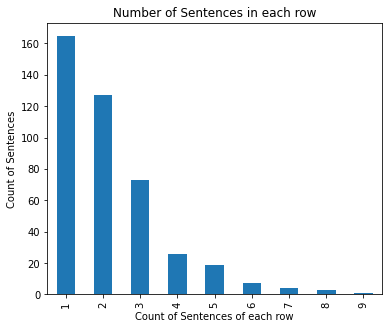

In [63]:
print("***********Get the sentence count of original Description column****************\n")

df['sentence_count']=df['Description'].apply(sentence_count)
print("Unique Counts : ", df['sentence_count'].unique())
df['sentence_count'].value_counts().plot(kind='bar',title="Number of Sentences in each row",figsize=(6,5));
plt.ylabel("Count of Sentences")
plt.xlabel("Count of Sentences of each row")

print('Minimum sentence_count of a line: {}'.format(df['sentence_count'].min()))
print('Maximum sentence_count of a line: {}'.format(df['sentence_count'].max()))
print('Line with maximum length:-\n{}\n'.format(df[df['sentence_count'] == df['sentence_count'].max()]['Description'].values[0]))


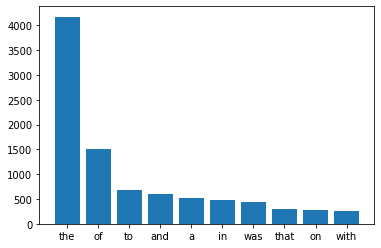

In [66]:
# pLot top stopwords
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(df['Description'])

We can evidently see that stopwords such as “the”,” to” dominate in **Decription** Column.

In [68]:
import pre_processor
from pre_processor import pre_process_data

x = pre_process_data()

df["CleanDescription"] = x.pre_process(df['Description'], 
                    lower_flag=1,
                    remove_spaces_flag=1, 
                    remove_new_line_flag=1,
                    remove_special_char_flag=1,  
                    remove_numbers_flag=1,  
                    replace_appos_flag=1,
                    remove_stop_words_flag=1,  
                    remove_single_letter_word_flag=1,
                    remove_two_letter_word_flag=1,
                    lemmatize_the_words_flag=0, 
                    stem_the_words_flag=0)

In [69]:
df[['Description','CleanDescription']].head()

,Description,CleanDescription
0,While removing the drill rod of the Jumbo 08 f...,removing drill rod jumbo maintenance superviso...
1,During the activation of a sodium sulphide pum...,activation sodium sulphide pump piping uncoupl...
2,In the sub-station MILPO located at level +170...,substation milpo located level collaborator ex...
3,Being 9:45 am. approximately in the Nv. 1880 C...,approximately cx personnel begins task unlocki...
4,Approximately at 11:45 a.m. in circumstances t...,approximately circumstances mechanics anthony ...


['removing', 'drill', 'rod', 'jumbo', 'maintenance', 'supervisor', 'proceeds', 'loosen', 'support', 'intermediate', 'centralizer', 'facilitate', 'removal', 'seeing', 'mechanic', 'supports', 'one', 'end', 'drill', 'equipment', 'pull', 'hands', 'bar', 'accelerate', 'removal', 'moment', 'bar', 'slides', 'point', 'support', 'tightens', 'fingers', 'mechanic', 'drilling', 'bar', 'beam', 'jumbo||activation', 'sodium', 'sulphide', 'pump', 'piping', 'uncoupled', 'sulfide', 'solution', 'designed', 'area', 'reach', 'maid', 'immediately', 'made', 'use', 'emergency', 'shower', 'directed', 'ambulatory', 'doctor', 'later', 'hospital', 'note', 'sulphide', 'solution', 'grams', 'liter||substation', 'milpo', 'located', 'level', 'collaborator', 'excavation', 'work', 'pick', 'hand', 'tool', 'hitting', 'rock', 'flat', 'part', 'beak', 'bounces', 'hitting', 'steel', 'tip', 'safety', 'shoe', 'metatarsal', 'area', 'left', 'foot', 'collaborator', 'causing', 'injury||approximately', 'cx', 'personnel', 'begins', '

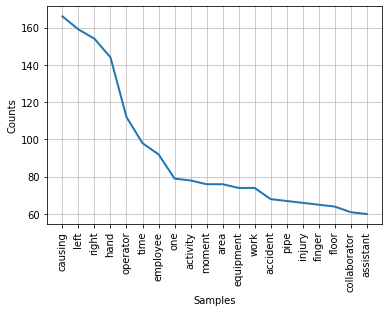

In [70]:
# Cleaned Description Plot
x2 = df['CleanDescription']

string_d2 = '||'.join(x2)

word_token = word_tokenize(string_d2)
print(word_token)

print("Cleaned Description Plot")
cts = nltk.FreqDist(word_token)
cts.plot(20)

We can evidently see that most repated word such as “causing”,left,right”dominate in **CleanedDecription** Column.

In [71]:

print("*****Get the count of number of words in a line after Description Preprocess*****\n")

df['line_words'] = [len(x.split()) for x in df['CleanDescription'].tolist()]

print('Minimum word length: {}'.format(df['line_words'].min()))
print('Maximum word length: {}'.format(df['line_words'].max()))
print('Line with maximum word:-\n{}\n'.format(df[df['line_words'] == df['line_words'].max()]['CleanDescription'].values[0]))

print("*****Get the minimum & maximum line length after preprocess*****\n")

df['line_length'] = df['CleanDescription'].str.len()

print('Minimum line length: {}'.format(df['line_length'].min()))
print('Maximum line length: {}'.format(df['line_length'].max()))
print('Line with maximum length:-\n{}\n'.format(df[df['line_length'] == df['line_length'].max()]['CleanDescription'].values[0]))

*****Get the count of number of words in a line after Description Preprocess*****

Minimum word length: 9
Maximum word length: 93
Line with maximum word:-
performing sleeve removal maneuver hole meters deep general silva pressed one side locking nut rods together jack holds entire weight rods maneuver locking procedure effective weight rods secured steel wire rope probe winch moment driller pedro released brake winch inefficacy locking done one side chestnut without aid monkey caused sliding rods auxiliary prepared manual unlocking rods holding faucet key firmly probe tower composition shifted stems slid hands shifted downward causing left hand strike base probe tower structure causing cuts th quirodactyl employee taken hospital went medical care wound sutured stitches removed days activities

*****Get the minimum & maximum line length after preprocess*****

Minimum line length: 61
Maximum line length: 664
Line with maximum length:-
level gallery holding activity bolter equipment opera

In [73]:
df.columns

Index(['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee type', 'Critical Risk',
       'Description', 'sentence_count', 'CleanDescription', 'line_words',
       'line_length'],
      dtype='object')

In [75]:
df[['Description','CleanDescription','sentence_count','line_words','line_length']].head()

,Description,CleanDescription,sentence_count,line_words,line_length
0,While removing the drill rod of the Jumbo 08 f...,removing drill rod jumbo maintenance superviso...,2,37,280
1,During the activation of a sodium sulphide pum...,activation sodium sulphide pump piping uncoupl...,3,27,205
2,In the sub-station MILPO located at level +170...,substation milpo located level collaborator ex...,1,28,194
3,Being 9:45 am. approximately in the Nv. 1880 C...,approximately cx personnel begins task unlocki...,3,46,343
4,Approximately at 11:45 a.m. in circumstances t...,approximately circumstances mechanics anthony ...,2,39,298


**NGRAMS**

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import string
import unicodedata
import spacy
nlp = spacy.load('en_core_web_sm')

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

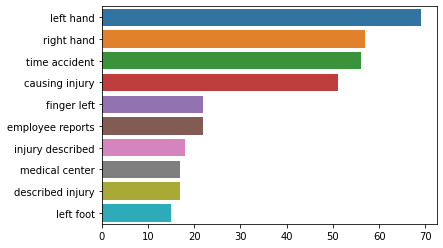

In [77]:
top_n_bigrams=get_top_ngram(df['CleanDescription'],2)[:10]
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

We can evidently see that most repated word such as “causing”,left,right”dominate in CleanedDecription Column.

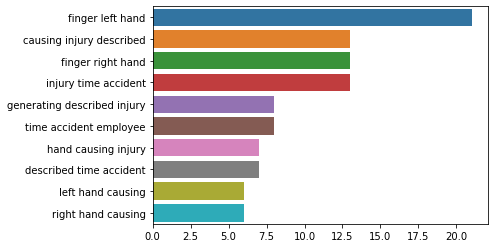

In [78]:
top_tri_grams=get_top_ngram(df['CleanDescription'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

In [79]:
# df = df.drop(['Description'],axis=1)
df.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,sentence_count,CleanDescription,line_words,line_length
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2,removing drill rod jumbo maintenance superviso...,37,280
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,3,activation sodium sulphide pump piping uncoupl...,27,205
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,1,substation milpo located level collaborator ex...,28,194
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,3,approximately cx personnel begins task unlocki...,46,343
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2,approximately circumstances mechanics anthony ...,39,298


****WordCloud**

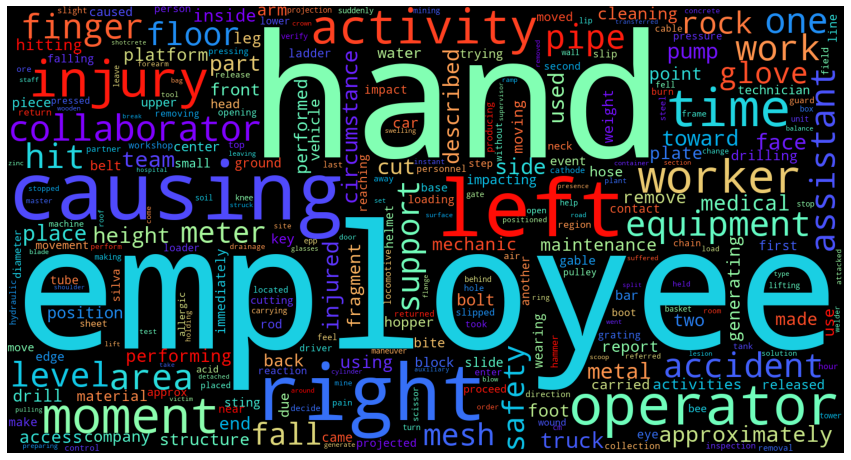

In [80]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(df['CleanDescription'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Observations:

There are many :
Body-related(left, right, hand, finger,foot), 
Employee related (employee, operator, collaborator, assistant, worker and mechanic),
Movement-related, 
Equipment-related to glove and accident and injury-related words, safety concerned words







In [ ]:
# Trying to implement what Shyam Suggested:

# Sentence count:

def sent_count(col):
  data = {}
  # i=0
  for inp in col:
    # i= i+1
    doc = nlp(inp)
    sentence_list = list(doc.sents)    
    length = len(sentence_list)
    data[i] = sentence_list     
    return data

data = sent_count(df['Description'])
data.values()